<span style='font-size:20px'>

# Using Classification Algorithms to Solve the MNIST Handwritten Numbers dataset

</span>

---

<span style='font-size:22px'>This code was written by **Edmar Junyor Bevilaqua**, if you want to know a little more about me, feel free to visit my social media:</span>
* <a href="https://www.linkedin.com/in/edmar-bevilaqua/"><span style='font-size:22px'>LinkedIn</span></a>
* <a href="https://github.com/edmar-bevilaqua"><span style='font-size:22px'>GitHub</span></a>
* <a href="https://www.instagram.com/edmar_bevilaqua/"><span style='font-size:22px'>Instagram</span></a>

---

<span style='font-size:25px'><strong>Note:</strong></span><br>
<span style='font-size:20px'>Most of the content you will see in this repository is based on projects I developed while learning Data Science, so if you want a more detailed and technical content, you can check the following books that I used to learn:</span><br>
* <span style='font-size:20px'><i>"Hands-On Machine Learning with Scikit-Learn, Keras &amp; TensorFlow"</i>, written by <a href="https://github.com/ageron"><strong>Aurélien Géron</strong></a> and published by <a href="https://www.oreilly.com/"><strong>O'Reilly</strong></a></span>. <br><br>
* <span style='font-size:20px'><i>"Python for Data Analysis: Data Wrangling with Pandas, Numpy, and Jupyter"</i>, written by <a href="https://github.com/wesm"><strong>Wes McKinney</strong></a> and published by <a href="https://www.oreilly.com/"><strong>O'Reilly</strong></a></span>. <br><br>
* <span style='font-size:20px'><i>"Aprendizado de Máquina - Uma Abordagem Estatística"</i>, written by <a href="https://github.com/rizbicki"><strong>Rafael Izbicki</strong></a> and <a href="https://tiagoms.com/"><strong>Tiago Mendonça dos Santos</strong></a> and published by <a href="https://loja.uiclap.com/titulo/ua24032/"><strong>UICLAP</strong></a></span>. <br>

<span style='font-size:20px'>Those books inspired me to learn more and more about Data Science.</span>
<br>

<br>

<span style='font-size:20px'>As said in the title of this Notebook, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the <a href="https://www.census.gov/"><strong>US Census Bureau</strong></a>. Each image is labeled with the digit it represents.<br><br>
    This set has been studied so much that it is often called the “hello world” of Machine Learning: whenever people come up with a new classification algorithm they are curious to see how it will perform on MNIST, and anyone who learns Machine Learning tackles this dataset sooner or later.</span>

# Importing the Dataset
---
<span style='font-size:20px'>This dataset is so famous that it is available inside the Scikit-Learn library:</span>

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto', as_frame=False) # The _784 is because this dataset is composed of 784 features (28 x 28 = 784 pixels images).
mnist.keys() # By default Scikit-Learn caches downloaded datasets in a directory called $HOME/scikit_learn_data.

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

<br>
<span style='font-size:25px'><strong>Note:</strong></span>

<br>

<span style='font-size:20px'>Datasets loaded by Scikit-Learn generally have a similar dictionary structure, including the following:</span>
<br>
* <span style='font-size:20px'>A DESCR key describing the dataset;</span>

* <span style='font-size:20px'>A data key containing an array with one row per instance and one column per feature;</span>

* <span style='font-size:20px'>A target key containing an array with the labels.</span>

<br>

In [2]:
print(mnist.DESCR) # Note from the creators:

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist['data']
y = mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


<br>

<span style='font-size:20px'>
    There are 70,000 images in this dataset, each containing 784 features.<br>
    This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s imshow() function:
</span><br><br>

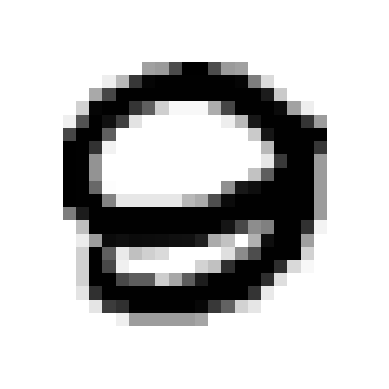

Target Value: 9


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

digit_number = np.random.randint(low=0, high=70000)
digit = X[digit_number]
plot_digit(digit)
plt.show()
print(f'Target Value: {y[digit_number]}')

In [5]:
print(f'Type of target value: {type(y[0])}') # Most ML expect numbers, so lets change the type of our target array.

y = y.astype(np.uint8)

Type of target value: <class 'str'>



---

<span style='font-size:25px'>
    Ploting a quick view of the first 25 digits in our dataset to demonstrate the complexity:
</span>

---
<br>

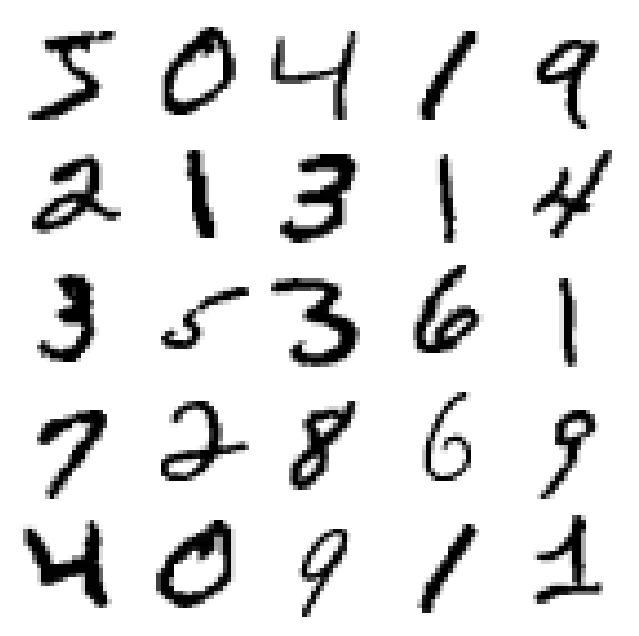

In [6]:
plt.figure(figsize=(8, 8))
for idx, image_data in enumerate(X[:25]):
    plt.subplot(5, 5, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

<span style='font-size:25px'>
    
# Splitting the set into Train and Test:
    
</span>

---

<span style='font-size:20px'>
    Hopefully, as we imported this set from Scikit-Learn library, it is already splitted:<br>
    The first 60,000 rows are for the training set, and the last 10,000 rows are for the test set.<br>
    Don't worry, the data is already shuffled and the test set is representative (contains approximately the same amount of each digit).
</span>
<br><br>

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<span style='font-size:22px'>
    
## Starting with a very simple classifier
    
</span>

---

<span style='font-size:20px'>
    To keep it simple in the beggining of our notebook, let's choose a number (in this case my favorite number: <strong>7</strong> )<br>
    Lets call this the "<i>Ultra 7 Detector Machine</i>"
</span>
<br><br>

In [8]:
# Code adaptation to consider only the target = 7 as True.

y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [9]:
from sklearn.linear_model import SGDClassifier # SGD stands for "Stocastic Gradient Descent", which is a type for the loss function

model_sgd = SGDClassifier(random_state=101)
model_sgd.fit(X_train, y_train_7)

SGDClassifier(random_state=101)

<br>

---

<span style='font-size:20px'>
    Let's see how is his performance:
</span>

---

<br>

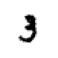

[False]



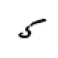

[False]



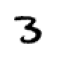

[False]



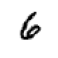

[False]



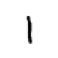

[False]



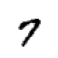

[ True]



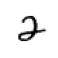

[False]



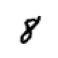

[False]



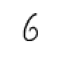

[False]



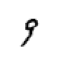

[ True]



In [10]:
for i in range(10, 20, 1):
    digit = X[i]
    plt.figure(figsize=(0.5,0.5))
    plot_digit(digit)
    plt.show()
    print(model_sgd.predict(digit.reshape(1,-1)), end='\n\n')

<br>

<span style='font-size:20px'>
    As we can see in the above output, the model said that the only number 7 plotted was True, which is correct, but the model also detected the last plot (number 9) as True, which is an error!
</span>
<br>
<br>

<span style='font-size:25px'>

# Measuring the Performance of Classification Models
    
</span>

---

<span style='font-size:20px'>
    Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend some time on this topic. There are many performance measures available, let's discuss about some new concepts and acronyms!
</span>
<br>
<br>
<br>

<span style='font-size:20px'>

## Measuring Accuracy Using Cross-Validation
    
</span>

---

<span style='font-size:20px'>
    We can use the Scikit-Learn cross-validation
</span>
<br>
<br>

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(model_sgd, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.9761, 0.9785, 0.9758])

<br>
<span style='font-size:20px'>
    Nice, all the 3 folds from Cross-validadtion was at least 97% accuracy, thas very good right?<br>
    Well, it depends. Let's try something different. Let's create a model that always say that the number is not 7 (The classifier returns False for everything!)
</span>
<br>
<br>

In [12]:
from sklearn.base import BaseEstimator

class Never7Classifier(BaseEstimator): # This class doesn't need the __init__ method because it don't have any hyperparameter
    def fit(self, X, y=None): # y=None for compatibility
        return self # The model does nothing!
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) # The model returns 0 for all predictions of X!

In [13]:
never_7 = Never7Classifier()
cross_val_score(never_7, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.89535, 0.8984 , 0.893  ])

<br>
<span style='font-size:20px'>
    Hummmmmm, that's quite interesting, isn't it?<br>
    Even the dumbest of the models (always return False) get's at least 89% accuracy. This is simply because only about 10% of the images are 7s, so if you always guess that an image is not a 7, you will be right about 90% of the time.<br>
    This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others - In our case: 90% aren't a 7s and only 10% are 7s).
</span>
<br>
<br>

<span style='font-size:20px'>

## Confusion Matrix
    
</span>

---

<span style='font-size:20px'>
    A much better way to evaluate the performance of a classifier is to look at the confusion matrix.<br>The general idea is to count the number of times instances of class A were classified as class A or something else. For example, to know the number of times the classifier got it right or got confused.
</span>
<br>
<br>

In [14]:
from sklearn.model_selection import cross_val_predict # This method returns the predictions made on each test fold

y_train_predictions = cross_val_predict(model_sgd, X_train, y_train_7, cv=3)

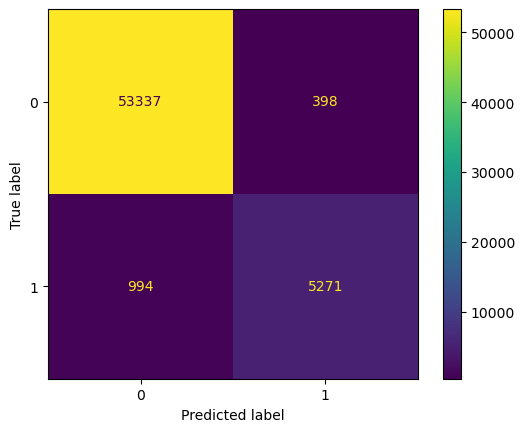

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_train_7, y_train_predictions)
ConfusionMatrixDisplay(conf_matrix).plot()

<br>
<span style='font-size:20px'>
    Each row in a confusion matrix represents an actual class, while each column represents a predicted class.<br>
    The first row of this matrix considers non-7 images (the negative class): 53,337 of them were correctly classified as non-7s (they are called True Negatives - TN), while the remaining 398 were wrongly classified as 7s (False Positives - FP).<br> The second row considers the images of 7s (the positive class): 994 were wrongly classified as non-7s (False Negatives - FN), while the remaining 5,271 were correctly classified as 7s (True Positives - TP). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):
</span>
<br>
<br>

<br>

---

<span style='font-size:20px'>
    Simulating a perfect classifier:
</span>

---

<br>

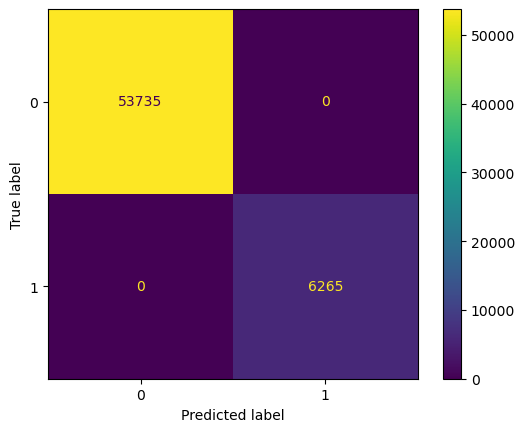

In [16]:
conf_matrix = confusion_matrix(y_train_7, y_train_7) # Pretending that both the prediction and the true label are equal!
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

<span style='font-size:20px'>

### Precision
    
</span>

---

<span style='font-size:20px'>
    Precision is the accuracy of the positive predictions from the classifier<br>
    It is defined by: Precision = TP / (TP + FP)
</span>
<br>
<br>


In [25]:
conf_matrix = confusion_matrix(y_train_7, y_train_predictions)
precision = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])
print(precision)

0.929793614394073


<br>
<br>
<span style='font-size:20px'>

### Recall
    
</span>

---

<span style='font-size:20px'>
    Also called <i>sensitivity</i> or the True Positive Rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier<br>
    It is defined by: Recall = TP / (TP + FN)
</span>
<br>
<br>


In [24]:
conf_matrix = confusion_matrix(y_train_7, y_train_predictions)
recall = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])
print(recall)

0.841340782122905


<br>

<span style='font-size:20px'>
    Scikit-Learn has methods to rapidly calculate these metrics:
</span>
<br>
<br>


In [26]:
from sklearn.metrics import precision_score, recall_score

print(f'Precision: {precision_score(y_train_7, y_train_predictions)}')
print(f'Recall: {recall_score(y_train_7, y_train_predictions)}')

Precision: 0.929793614394073
Recall: 0.841340782122905


<br>
<br>
<span style='font-size:20px'>

### F<sub>1</sub> Measure
    
</span>

---

<span style='font-size:20px'>
    It is often convenient to combine precision and recall into a single metric called the F<sub>1</sub>-score, in particular if you need a simple way to compare two classifiers. The F<sub>1</sub>-score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F<sub>1</sub>-score if both recall and precision are high.
</span>
<br>
<br>


In [27]:
from sklearn.metrics import f1_score

print(f'F1-Score: {f1_score(y_train_7, y_train_predictions)}')

F1-Score: 0.8833584715937657


<br>
<br>
<span style='font-size:20px'>

### Precision / Recall Trade-off
    
</span>

---

<span style='font-size:20px'>
    To understand this trade-off, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function. If that score is greater than a threshold (The SGDClassifier uses a threshold equal to 0), it assigns the instance to the positive class, otherwise it assigns it to the negative class.<br>
    Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then use any threshold you want to make predictions based on those scores:
</span>
<br>
<br>


[73.19563852]
Is it a 7? [ True]


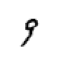

In [31]:
score = model_sgd.decision_function([digit])
threshold = 0
print(score)
print(f'Is it a 7? {score > threshold}')

plt.figure(figsize=(0.5,0.5))
plot_digit(digit)
plt.show()

<br>

<span style='font-size:20px'>
    As we can see above, the classifier was wrong, the number in this case was a 9, so it should've returned "False".<br>
    If we increase his threshold, to a higher number, let's say 1000, let's see whats happens:
</span>
<br>
<br>

[73.19563852]
Is it a 7? [False]


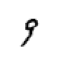

In [32]:
score = model_sgd.decision_function([digit])
threshold = 1000
print(score)
print(f'Is it a 7? {score > threshold}')

plt.figure(figsize=(0.5,0.5))
plot_digit(digit)
plt.show()

<br>

<span style='font-size:20px'>
    As expected, now the classifier will say that this is not a 7, increasing it's precision. But because we increased the threshold, we also decreased the recall of our classifiers, because now even if we have a 7 with the a threshold below 1000, it will return False.
</span>
<br>
<br>

[-3102.50473041]
Is it a 7? [False]


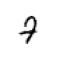

In [35]:
a_seven = X[148]
score = model_sgd.decision_function([a_seven])
threshold = 1000
print(score)
print(f'Is it a 7? {score > threshold}')

plt.figure(figsize=(0.5,0.5))
plot_digit(a_seven)
plt.show()

<br>

<span style='font-size:20px'>
    In the above output, we clearly have a 7:
</span>
<br>
<br>

<br>
<br>
<span style='font-size:20px'>

### How to Decide Which Threshold To Use?
    
</span>

---

<span style='font-size:20px'>
    First, let's use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions<br>
    With these scores, let's use the precision_recall_curve() function to compute precision and recall for all possible thresholds<br>
    Finally, use Matplotlib to plot precision and recall as functions of the threshold value:
</span>
<br>
<br>


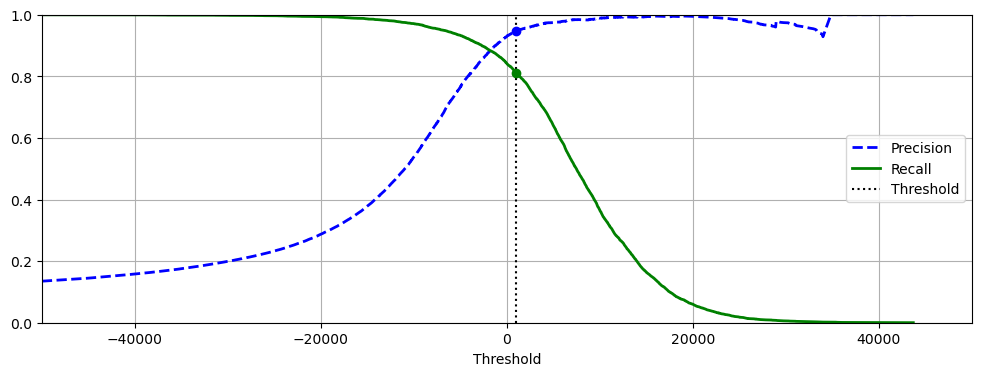

In [37]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(model_sgd, X_train, y_train_7, cv=3, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores) # This method can be unwrapped into 3 variables: precisions, recalls, thresholds.

plt.figure(figsize=(12, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()